## Dataset Prep.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(palette='tab10',font='Lucida Calligraphy',font_scale=1.5,rc=None)
import matplotlib
matplotlib.rcParams.update({'font.size':15})
plt.style.use('dark_background')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
data=pd.read_csv("D:/MACHINE LEARNING/Indus Internship/Maintenance_Info2.csv")

data=data.drop(["UDI","Product ID"],axis=1)

data.sample(6).style.set_properties(**{'background-color': 'Green',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
3079,L,300.100000,309.300000,1340,56.000000,130,0,No Failure
4905,L,303.600000,312.400000,1363,53.100000,7,0,No Failure
2931,L,300.800000,309.700000,1373,45.400000,179,0,No Failure
3351,L,301.400000,310.800000,1680,31.400000,185,0,No Failure
290,L,298.100000,308.400000,1438,45.600000,105,0,No Failure
1669,L,298.200000,307.900000,1544,31.400000,192,0,No Failure


In [6]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [76]:
# Converting temperature unit from K to C

In [9]:
data["Air temperature [K]"] = data["Air temperature [K]"] - 272.15
data["Process temperature [K]"] = data["Process temperature [K]"] - 272.15

data.rename(columns={"Air temperature [K]": "Air temperature [°C]",
                     "Process temperature [K]": "Process temperature [°C]"}, inplace=True)


In [10]:
data.columns

Index(['Type', 'Air temperature [°C]', 'Process temperature [°C]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [11]:
data.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8631,H,25.15,36.15,1506,37.0,54,0,No Failure
8361,L,26.45,37.35,1450,44.3,7,0,No Failure
1985,L,25.95,35.55,1537,40.8,169,0,No Failure
8312,M,26.65,37.85,1529,38.5,77,0,No Failure
8906,L,25.15,36.55,1592,34.4,158,0,No Failure


In [80]:
data["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

In [81]:
data.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
9144,M,25.35,36.35,1447,41.6,118,0,No Failure,11.0
4593,L,30.85,39.05,1409,41.9,98,0,No Failure,8.2
3535,H,29.75,38.85,1672,29.9,13,0,No Failure,9.1
459,L,25.25,36.45,1476,42.3,107,0,No Failure,11.2
6641,L,29.35,38.35,1702,28.7,135,0,No Failure,9.0


In [82]:
data.shape

(10000, 9)

In [83]:
data.size

90000

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [88]:
data.describe()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


In [94]:
data.describe().style.background_gradient(cmap="cividis")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


## Data Analysis and Visualization

In [287]:
data.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,25.95,36.45,1551,42.8,0,0,0
1,2,26.05,36.55,1408,46.3,3,0,0
2,2,25.95,36.35,1498,49.4,5,0,0
3,2,26.05,36.45,1433,39.5,7,0,0
4,2,26.05,36.55,1408,40.0,9,0,0


In [ ]:
!pip install missingno

In [117]:
plt.rcParams['font.family'] = 'Arial'

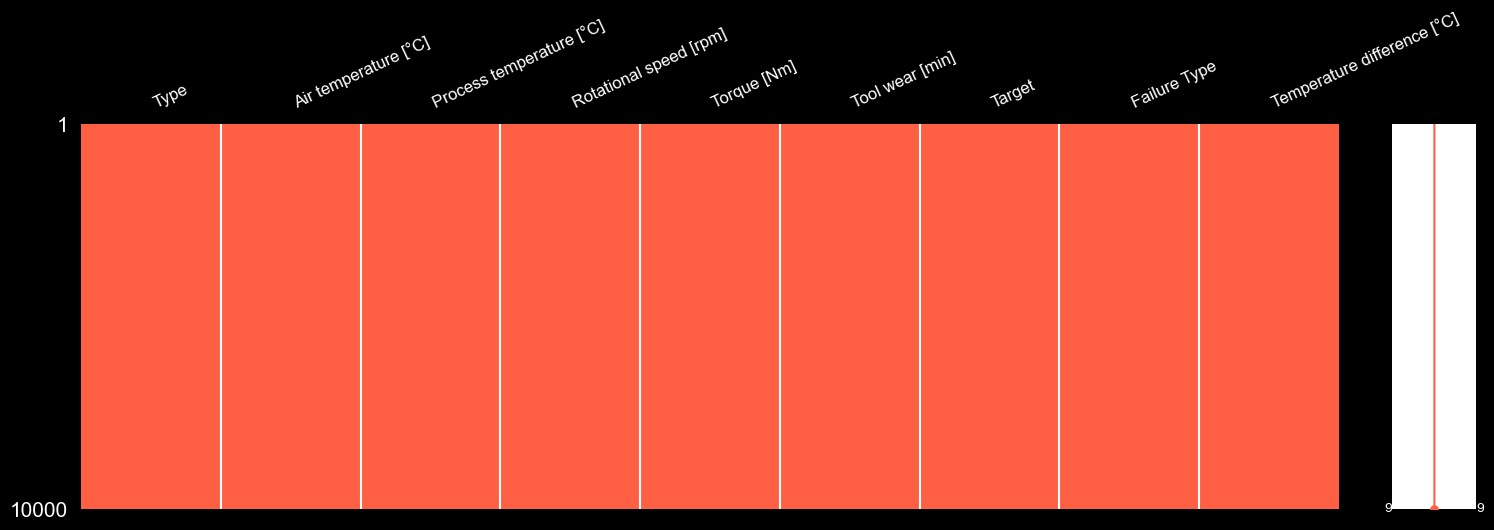

In [118]:
import missingno as msno
msno.matrix(data, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


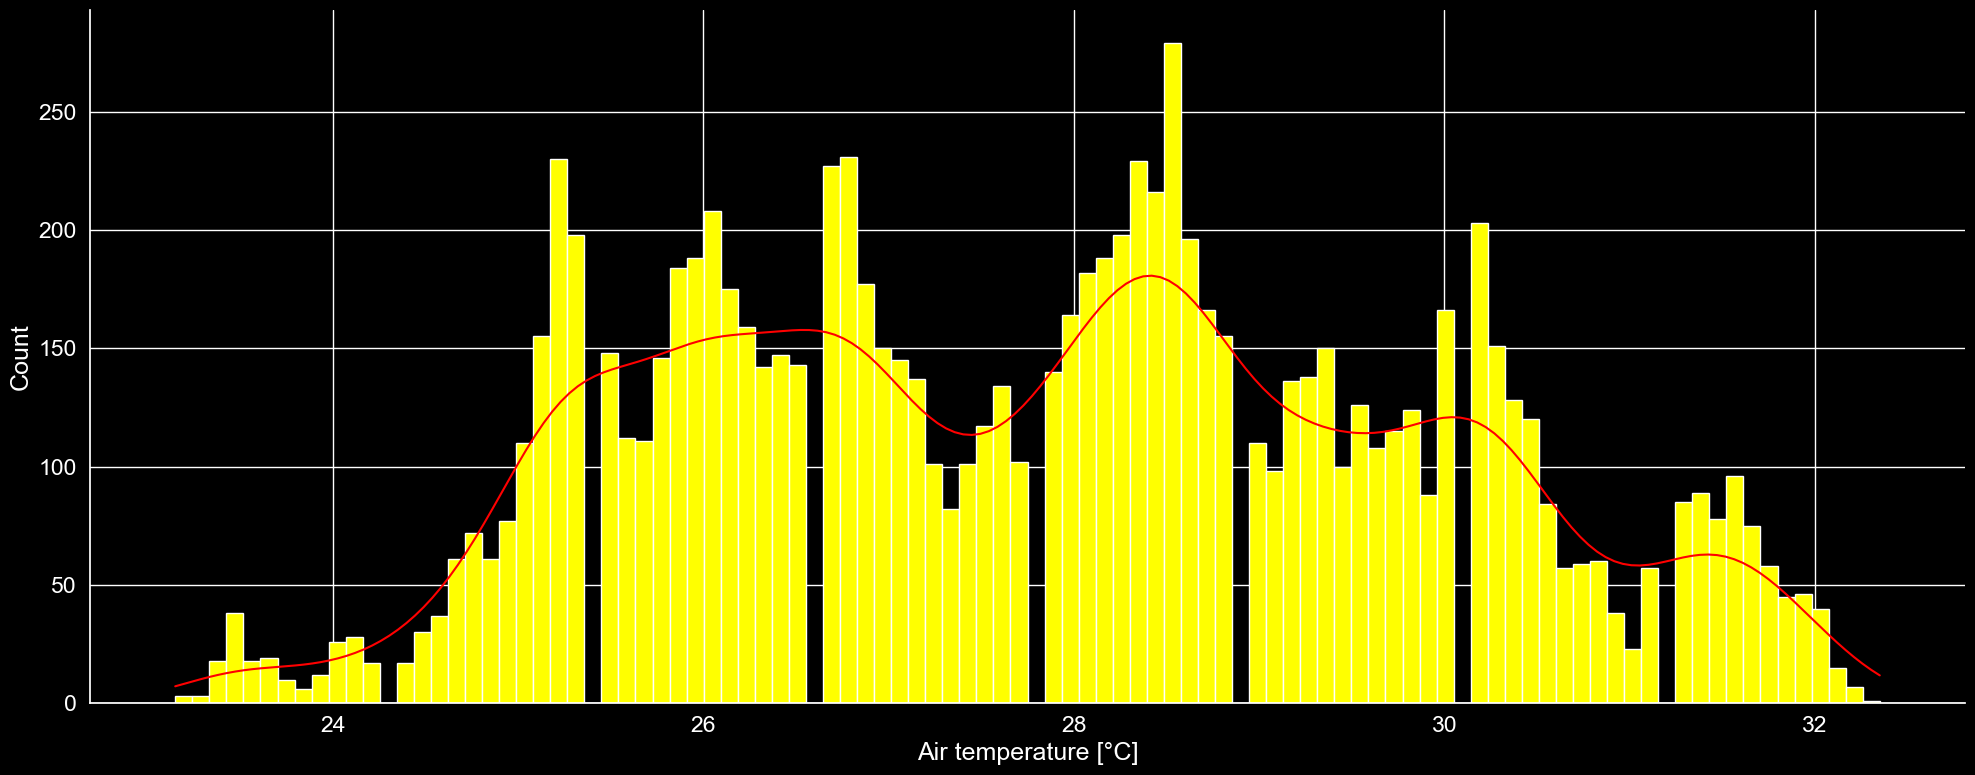

In [124]:
sns.displot(data=data, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 8, aspect = 2.5);

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


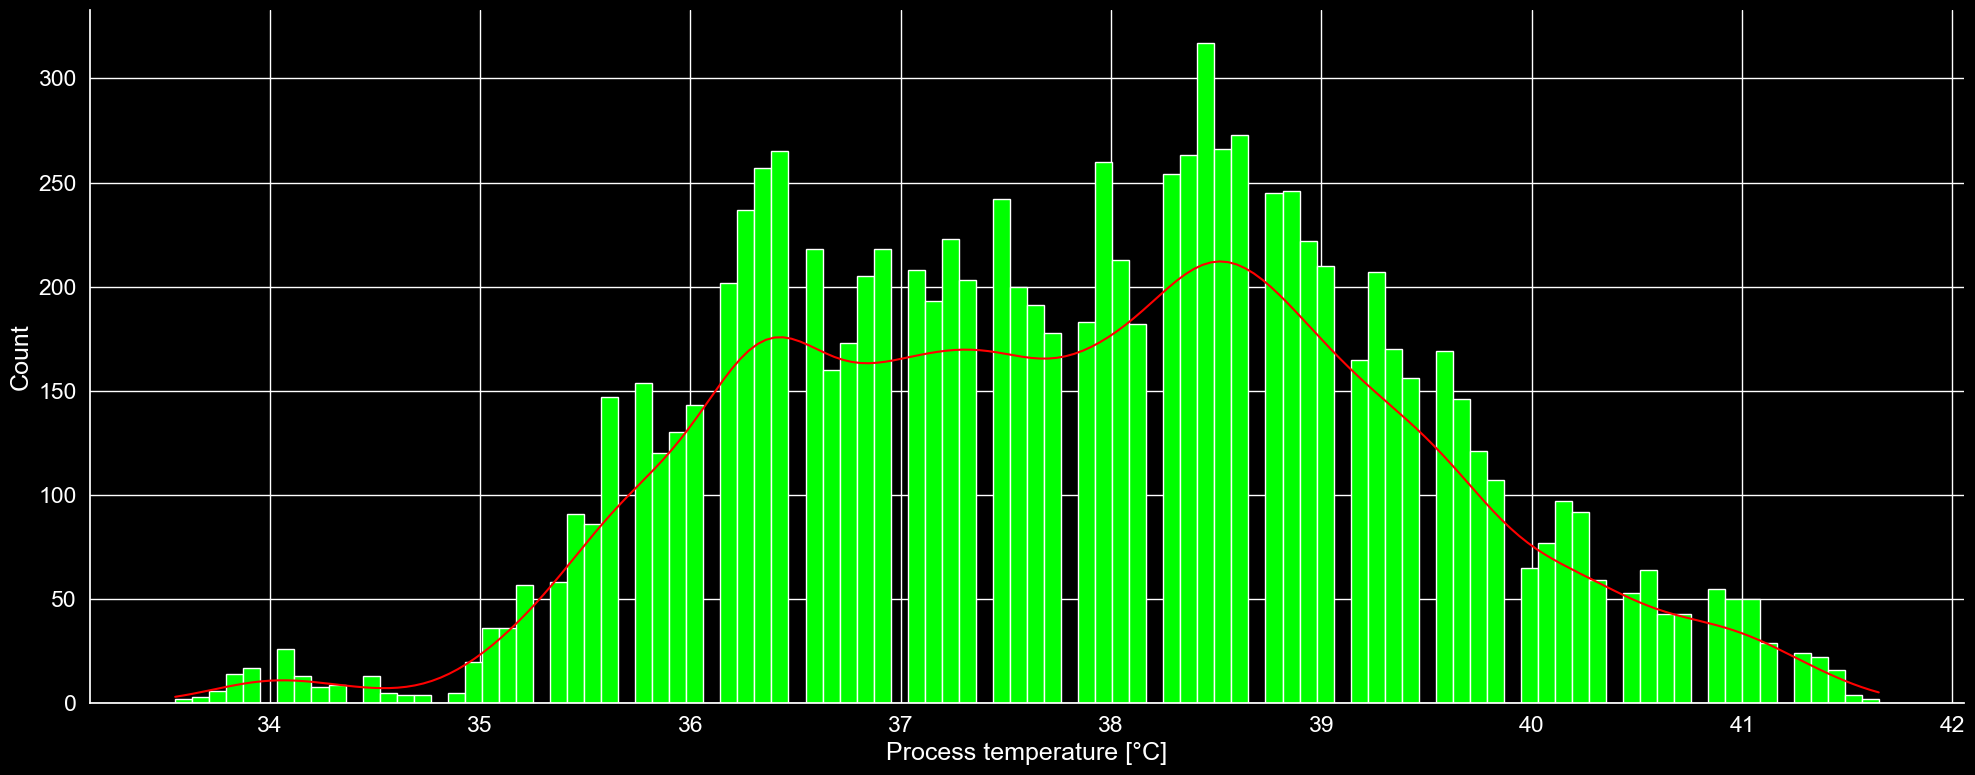

In [126]:
sns.displot(data=data, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 8, aspect = 2.5);

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


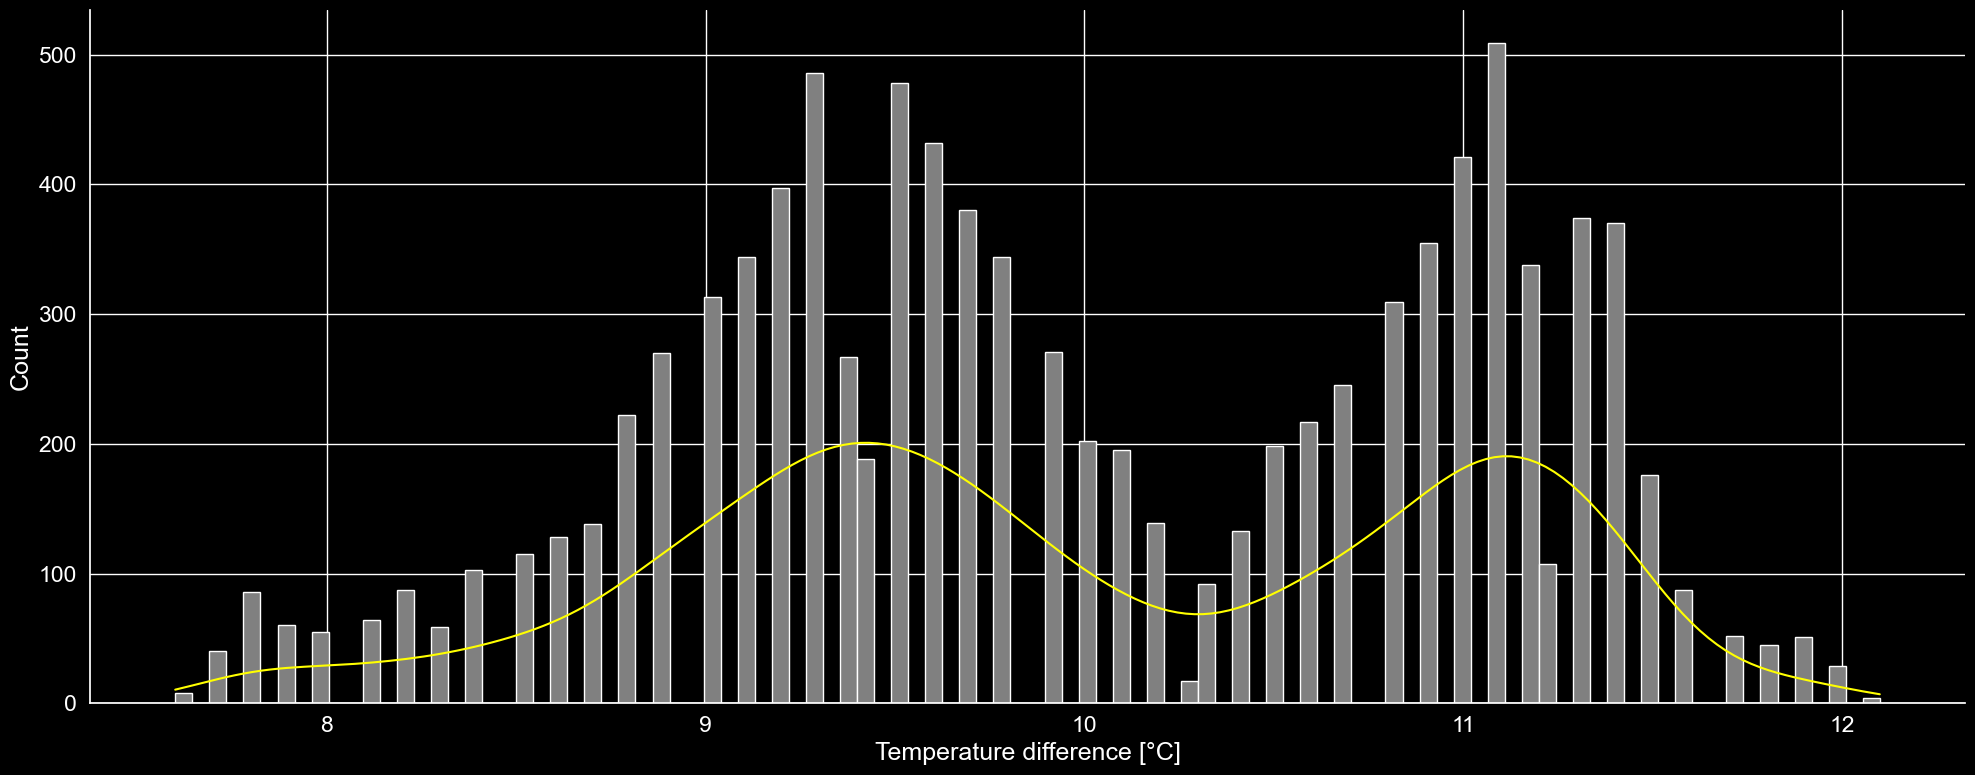

In [134]:
sns.displot(data=data, x="Temperature difference [°C]", kde=True, bins = 100,color = "yellow", facecolor = "grey",height = 8, aspect = 2.5);

In [136]:
for col in data[['Type','Target','Failure Type']]:
    print(data[col].value_counts()) 
    print("****"*10)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
****************************************
Target
0    9661
1     339
Name: count, dtype: int64
****************************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
****************************************


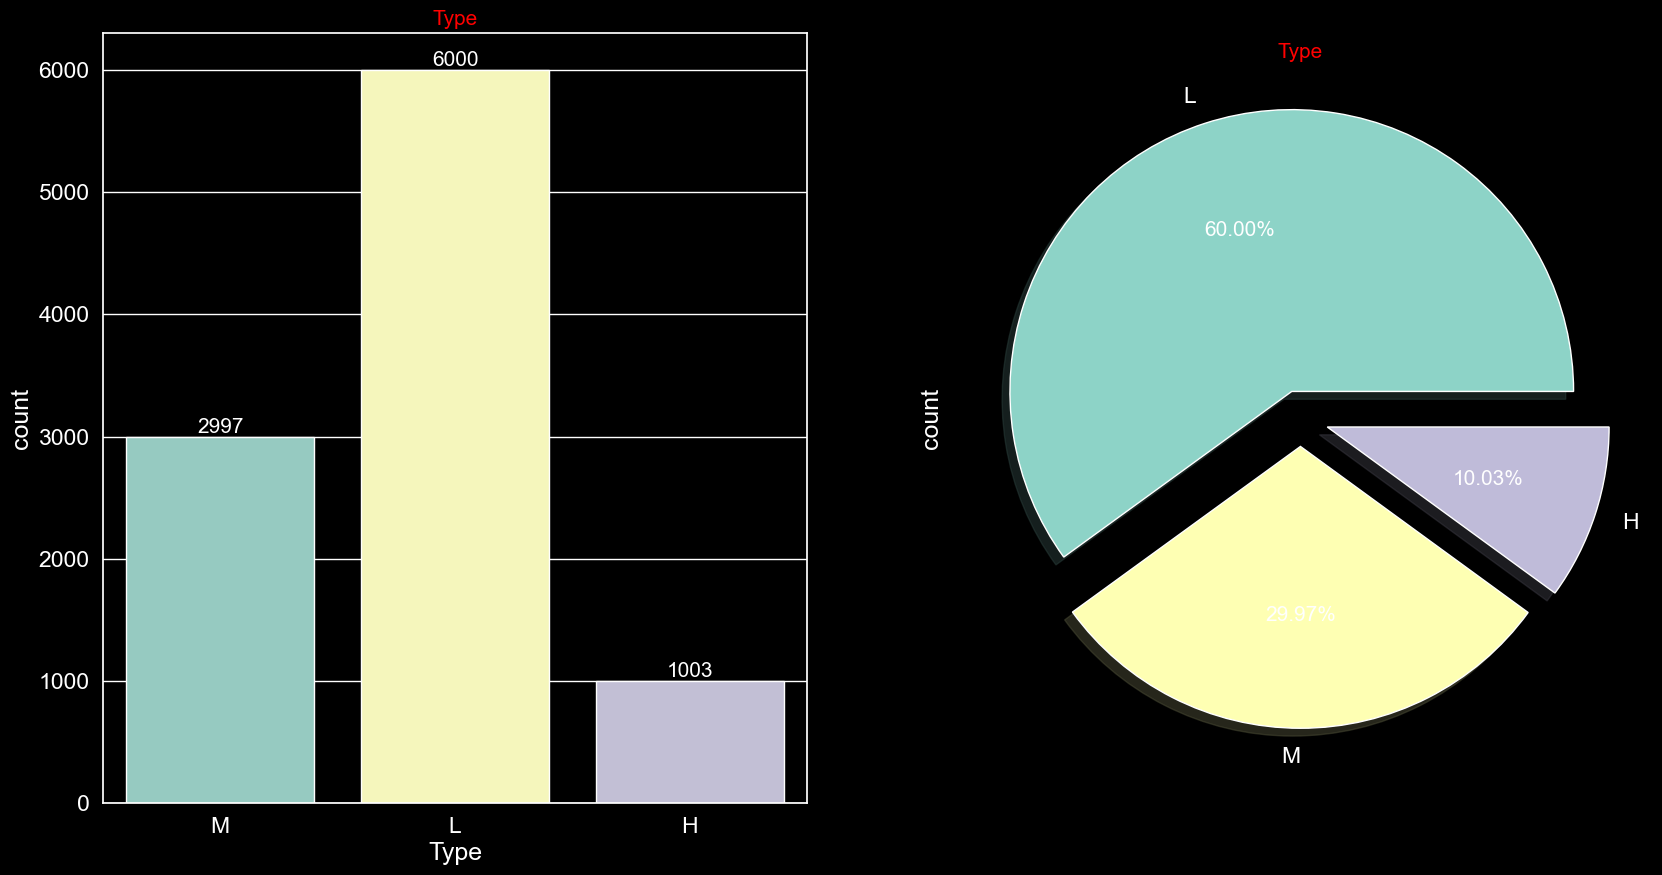

In [167]:
ax = plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=data)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=30,color='Red',font='Arial')

ax =plt.subplot(1,2,2)
ax=data['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 30,color='Red',font='Arial');

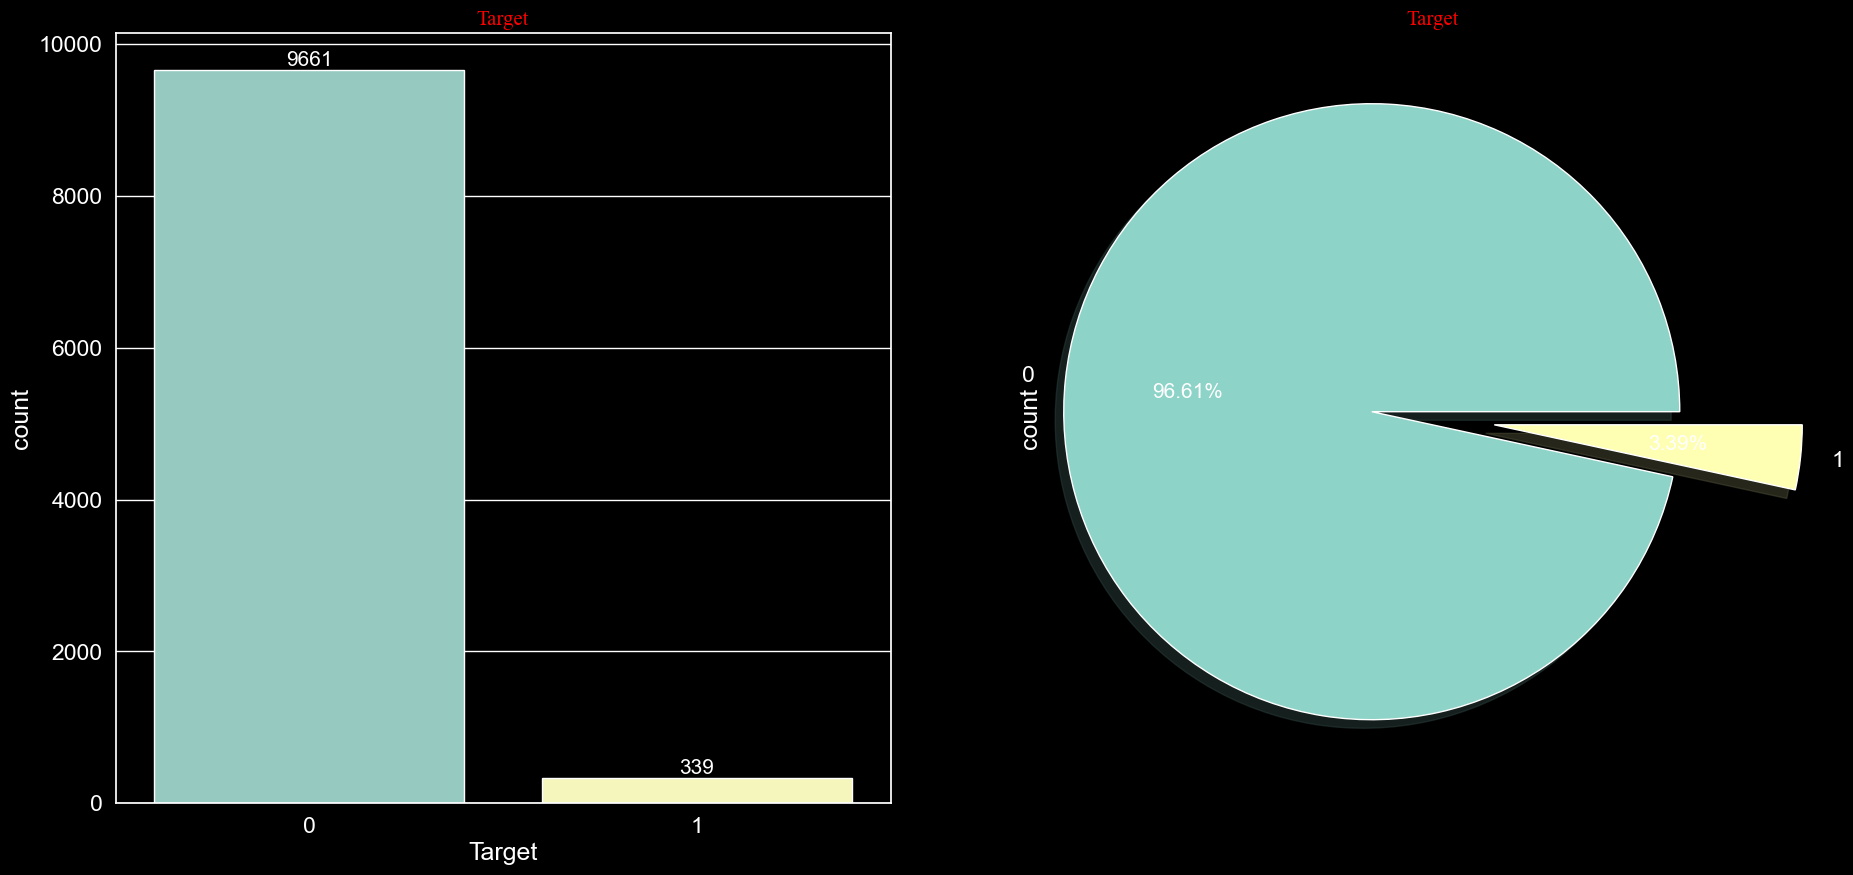

In [176]:
ax = plt.figure(figsize=(22,10))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=data)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=30,color='Red',font='Times New Roman')

ax =plt.subplot(1,2,2)
ax=data['Target'].value_counts().plot.pie(explode=[0.2, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 30,color='Red',font='Times New Roman');

Text(0.5, 1.0, 'FAILURE TYPES')

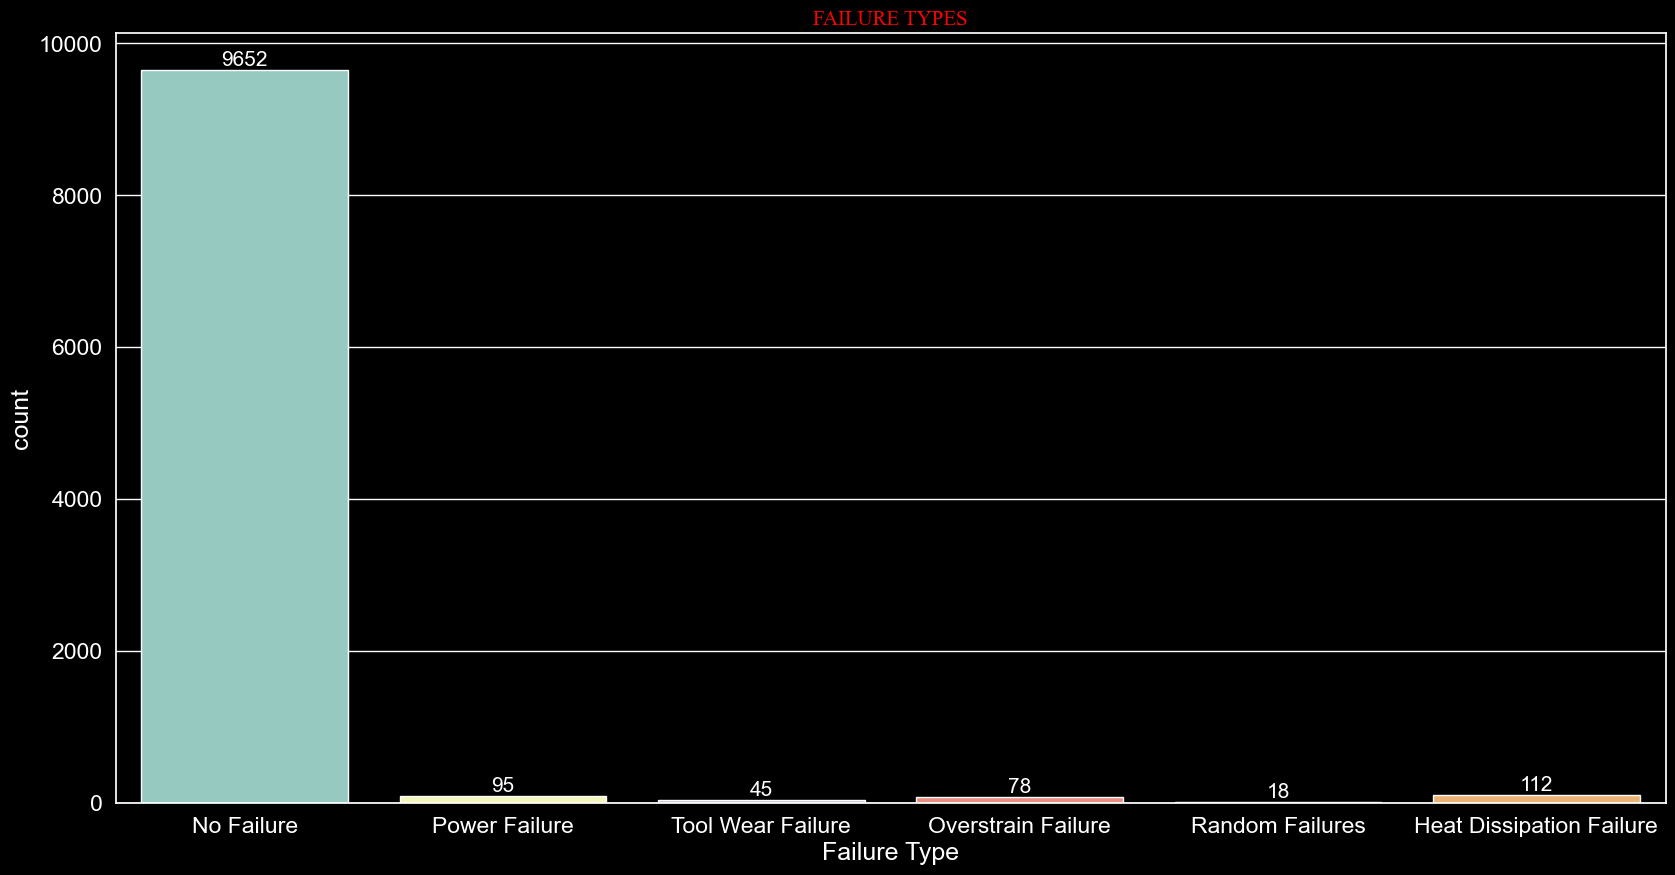

In [197]:
ax = plt.figure(figsize=(20,10))

ax = sns.countplot(x='Failure Type', data=data)
ax.bar_label(ax.containers[0])
plt.title("FAILURE TYPES", fontsize=30,color='Red',font='Times New Roman')



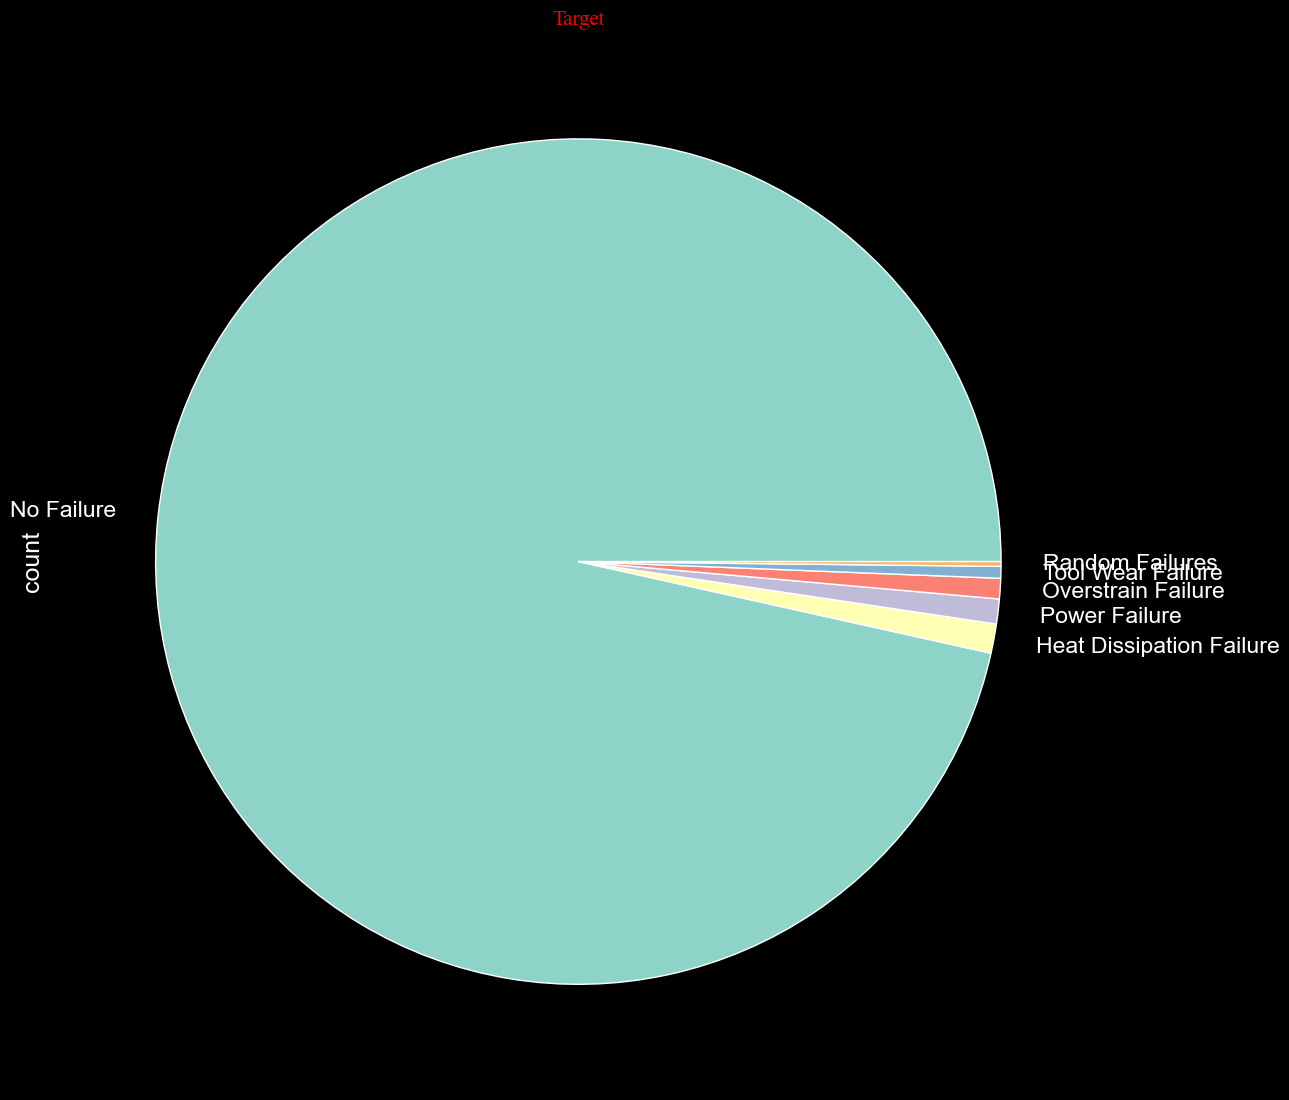

In [195]:
ax = plt.figure(figsize=(30,15))

ax =plt.subplot(1,2,2)
ax=data['Failure Type'].value_counts().plot.pie();
ax.set_title(label = "Target", fontsize = 30,color='Red',font='Times New Roman');

In [205]:
data.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


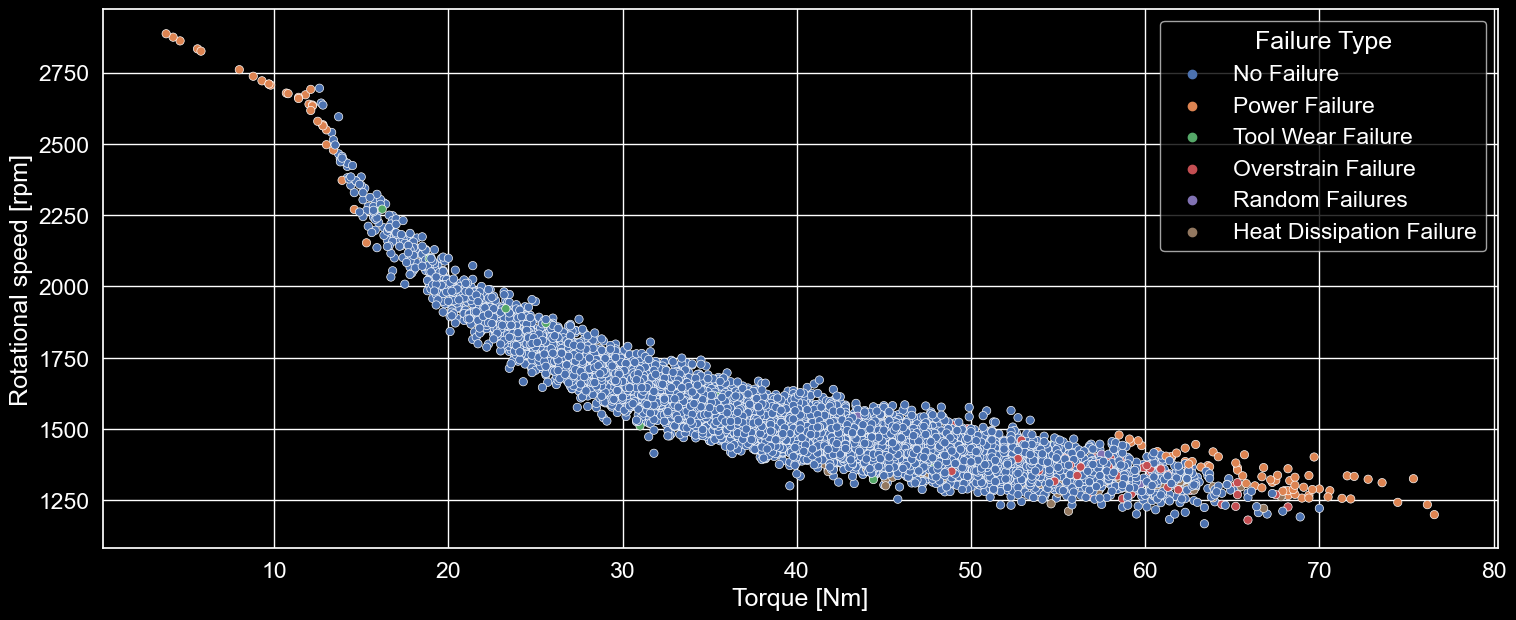

In [211]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="deep");

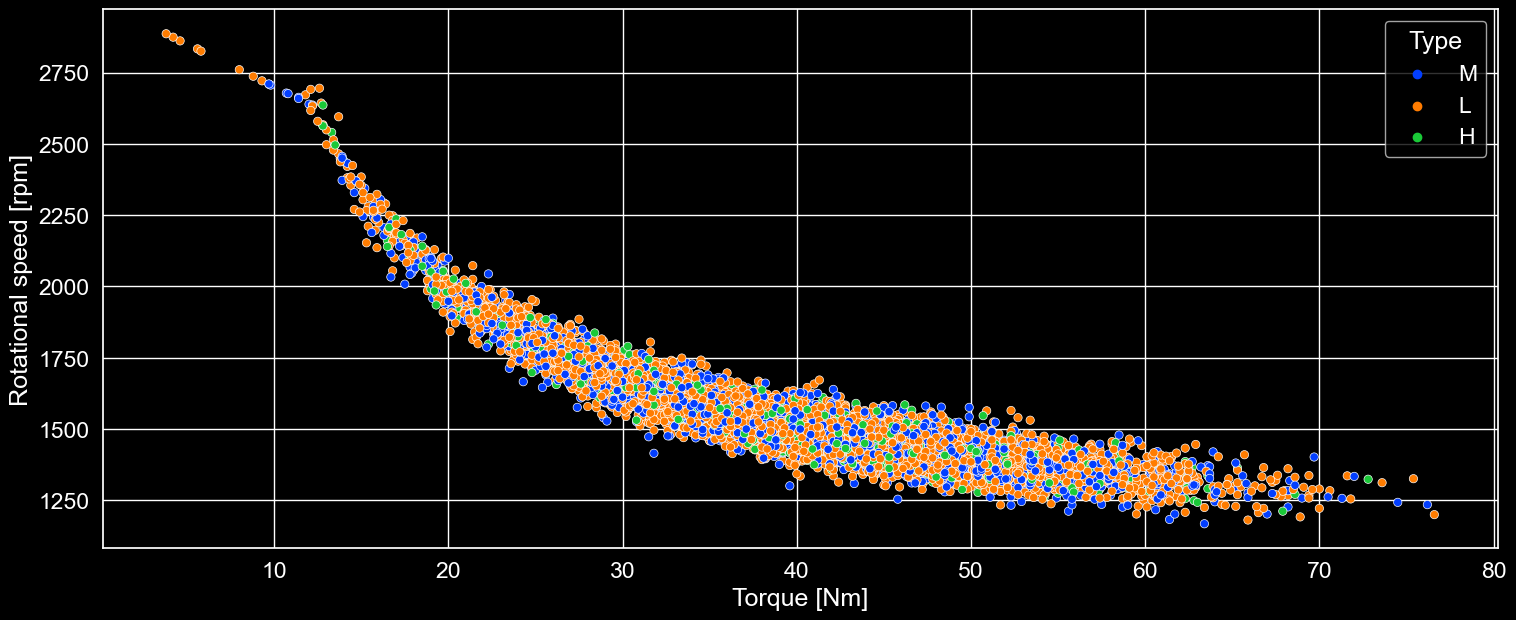

In [212]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="bright");

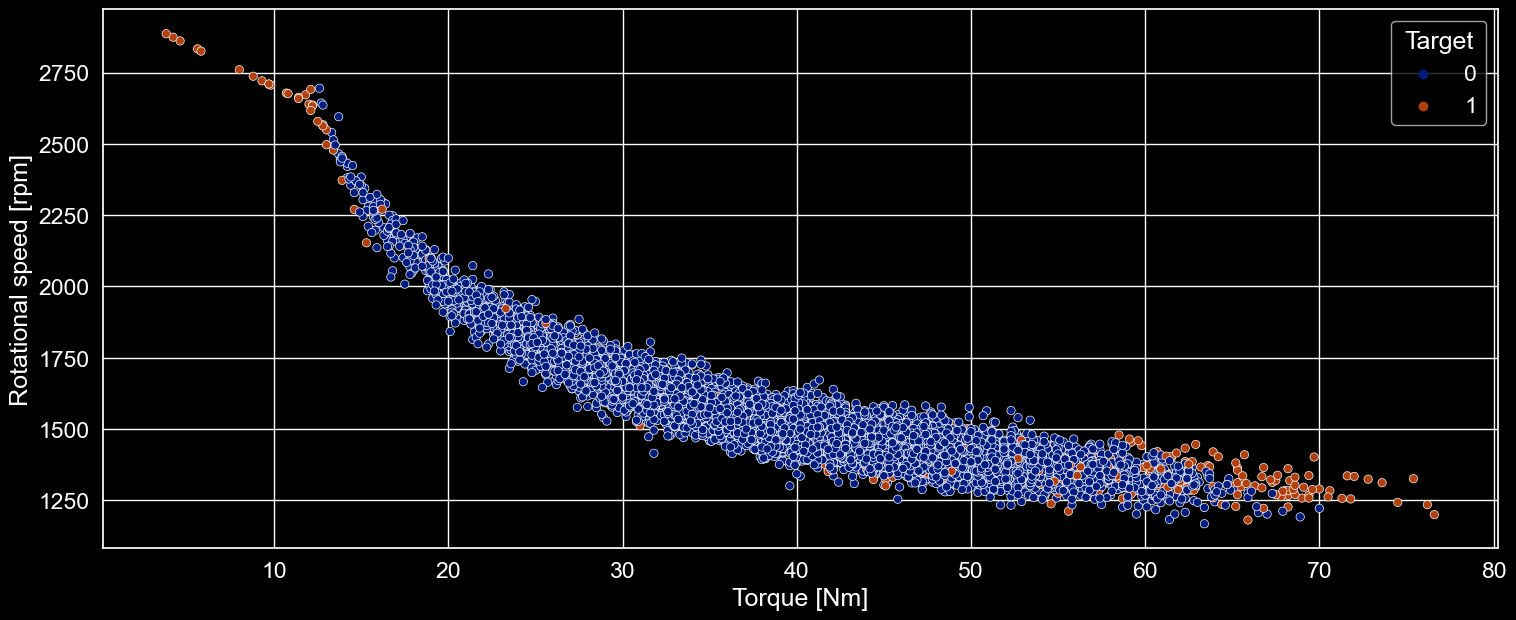

In [213]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="dark");

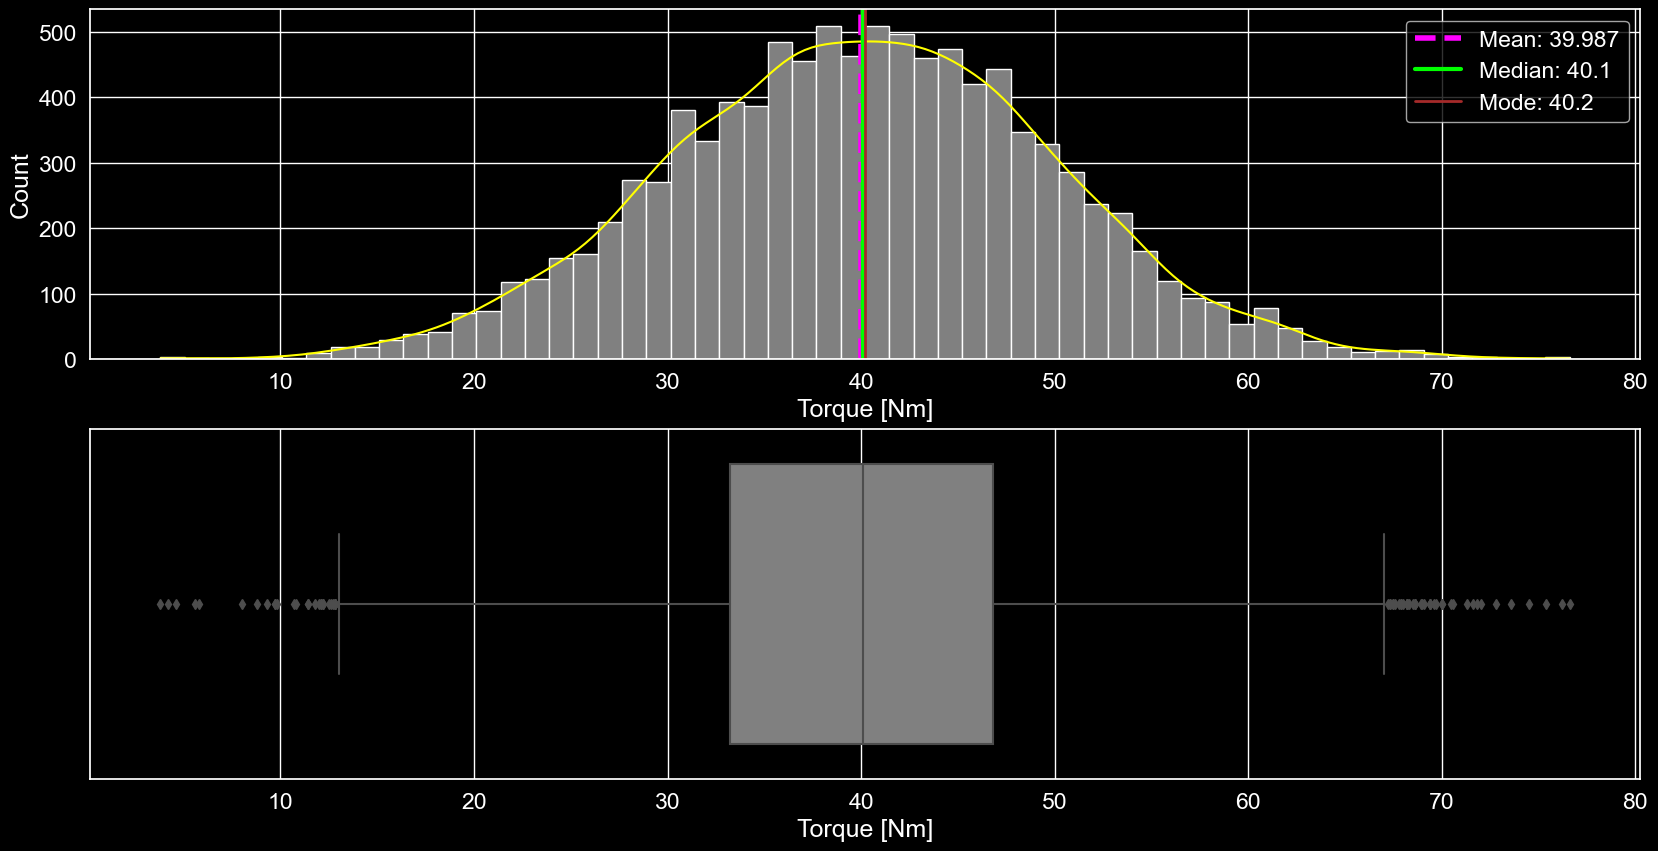

In [257]:
import statistics

def plot_hist(data,feature):
    fig, ax = plt.subplots(2, 1, figsize=(20,10))
    
    sns.histplot(data = data[feature], kde = True, ax = ax[0],color='yellow',facecolor="grey")

    ax[0].axvline(x = data[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 4, label = 'Mean: {}'.format(round(data[feature].mean(), 3)))
    ax[0].axvline(x = data[feature].median(), color = 'lime', linewidth = 3, label = 'Median: {}'.format(round(data[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(data[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(data[feature])))
    ax[0].legend()
    
    sns.boxplot(x = data[feature], ax = ax[1],color='grey')
    
    plt.show()

plot_hist(data,'Torque [Nm]')


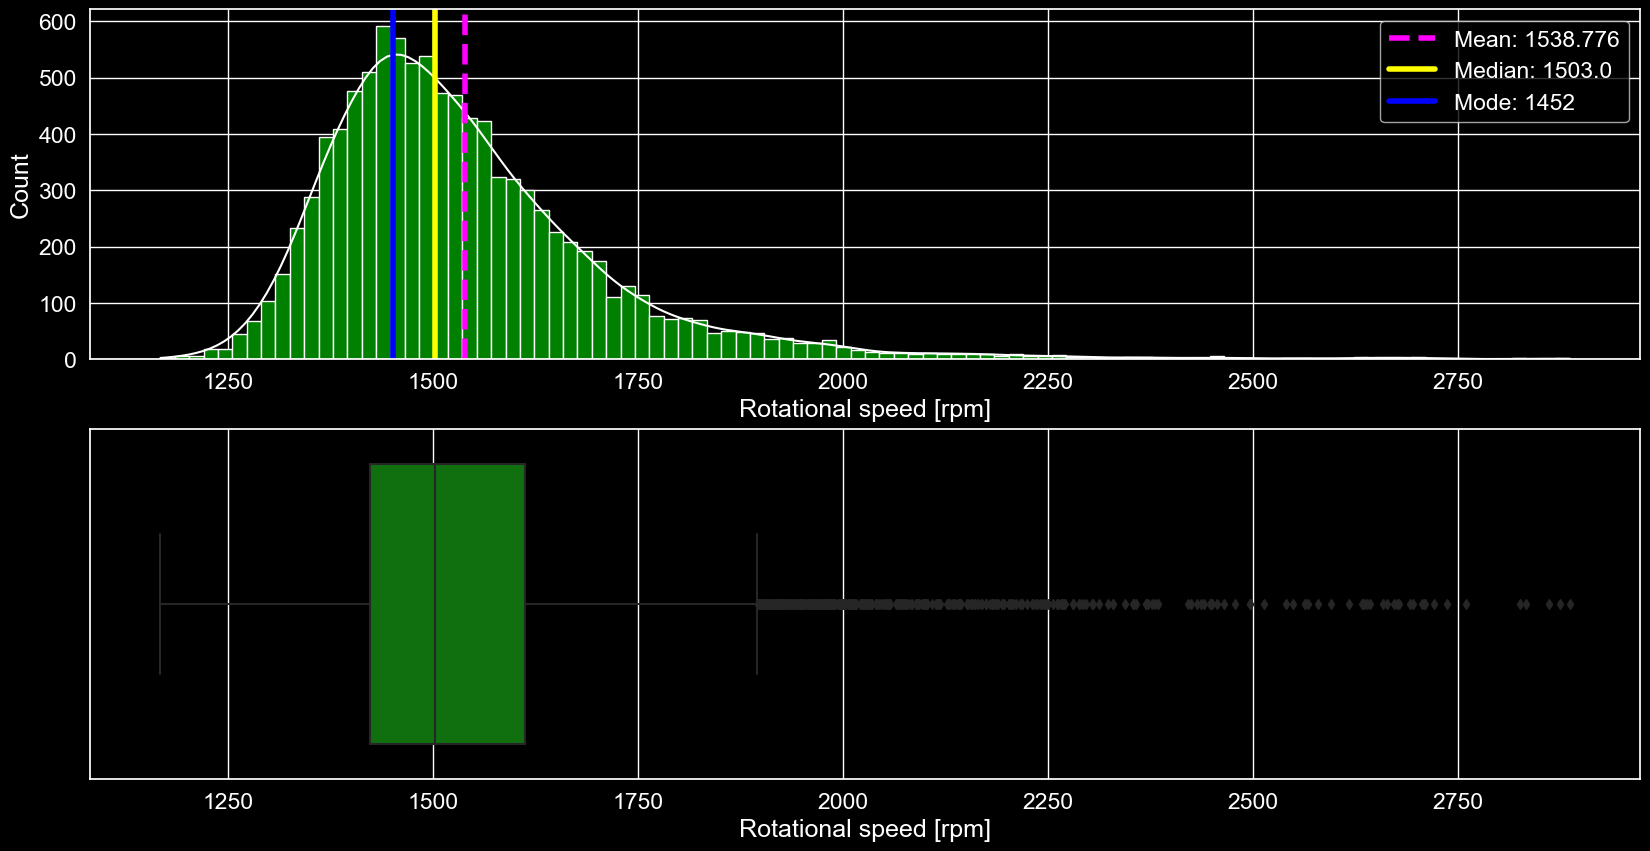

In [258]:
import statistics

def plot_hist(data,feature):
    fig, ax = plt.subplots(2, 1, figsize=(20,10))
    
    sns.histplot(data = data[feature], kde = True, ax = ax[0],color='white',facecolor="green")

    ax[0].axvline(x = data[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 4, label = 'Mean: {}'.format(round(data[feature].mean(), 3)))
    ax[0].axvline(x = data[feature].median(), color = 'yellow', linewidth = 4, label = 'Median: {}'.format(round(data[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(data[feature]), color = 'blue', linewidth = 4, label = 'Mode: {}'.format(statistics.mode(data[feature])))
    ax[0].legend()
    
    sns.boxplot(x = data[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist(data,'Rotational speed [rpm]')


C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


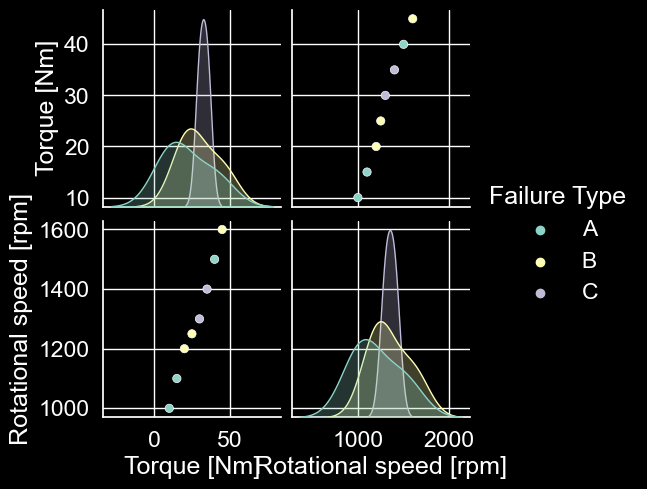

In [265]:
sns.pairplot(df,hue = "Failure Type");

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


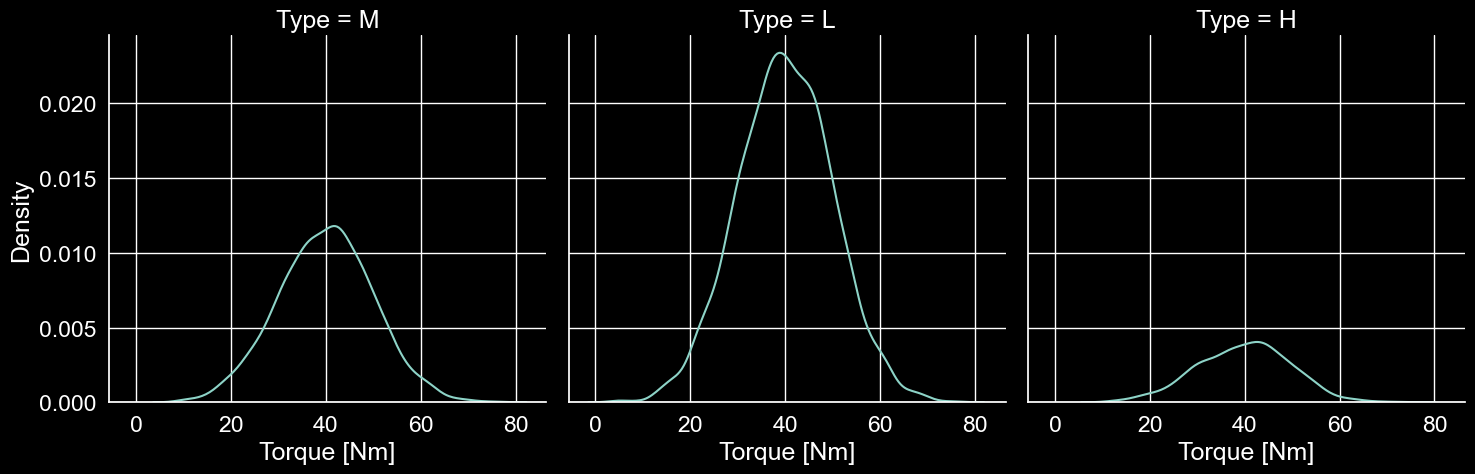

In [274]:
sns.displot(data=data, x="Torque [Nm]", col="Type", kind="kde");

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


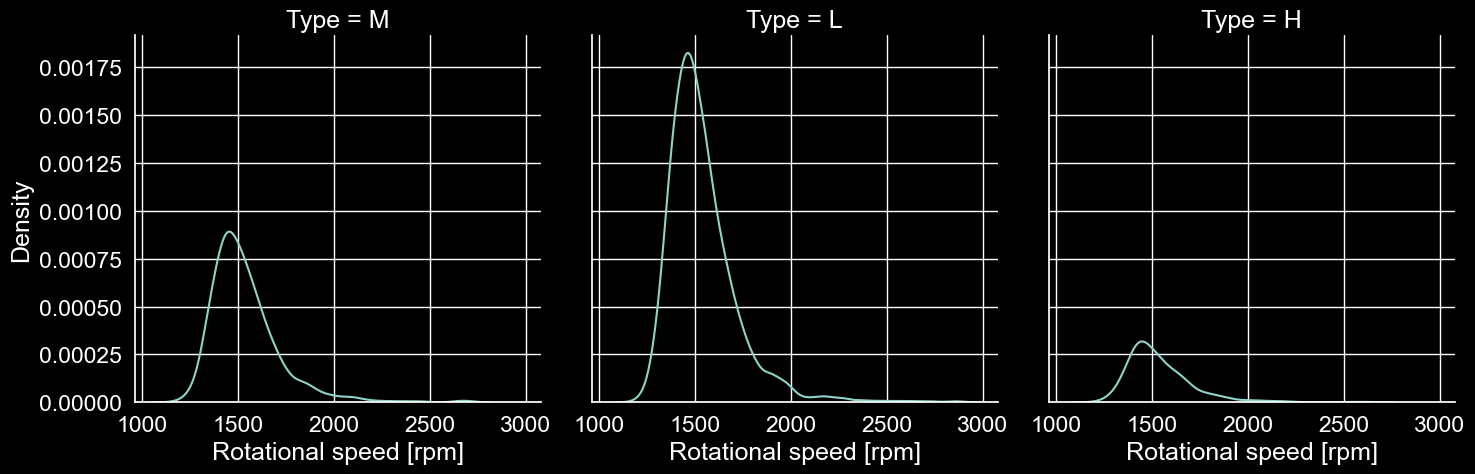

In [268]:
sns.displot(data=data, x="Rotational speed [rpm]", col="Type", kind="kde");

C:\Users\Integrated\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


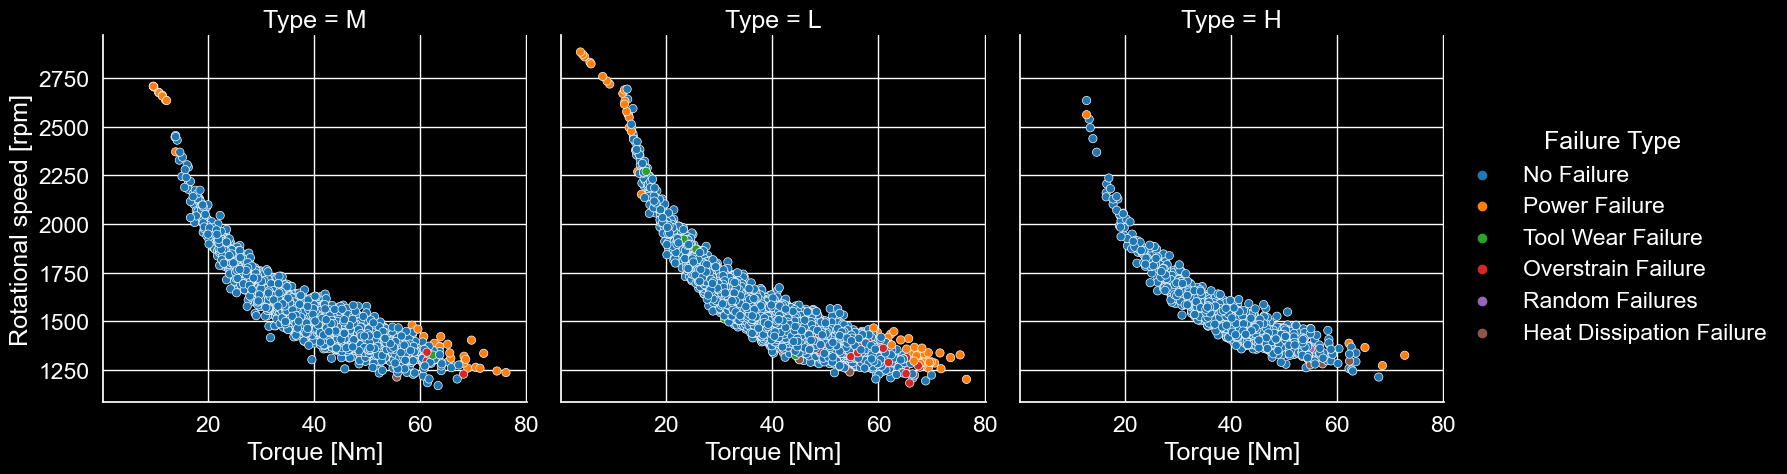

In [270]:
sns.relplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

## Preprocessing

In [ ]:
!pip install category_encoders

In [12]:
import category_encoders as ce
    encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
    data = encoder.fit_transform(data)

In [13]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
data['Failure Type'] = scaler.fit_transform(data['Failure Type'])

In [14]:
data.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8307,1,26.55,37.95,1402,69.7,64,1,1
3558,2,29.55,38.45,1743,26.2,71,0,0
539,1,25.25,37.15,1775,25.8,91,0,0
8848,1,25.35,36.75,1436,44.8,2,0,0
1867,2,25.95,35.75,1502,41.8,79,0,0


In [15]:
x = data.drop(columns="Failure Type" , axis=1)
y = data["Failure Type"]

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

## Logistic Regression

In [ ]:
pip install --upgrade scikit-learn


In [69]:
from sklearn.linear_model import LogisticRegression
x=(x-np.min(x))/(np.max(x)-np.min(x))

C:\Users\Integrated\AppData\Local\Temp\ipykernel_6496\3669188518.py:2: RuntimeWarning: invalid value encountered in divide
  x=(x-np.min(x))/(np.max(x)-np.min(x))


In [70]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

C:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
accuracy = log.score(x_test, y_test) * 100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 96.75%


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score
a=precision_score(y_test,y_pred1,average='macro')
a

0.1611024169709616

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
accuracy = dt.score(x_test, y_test) * 100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 92.35%


Accuracy = 92.65%


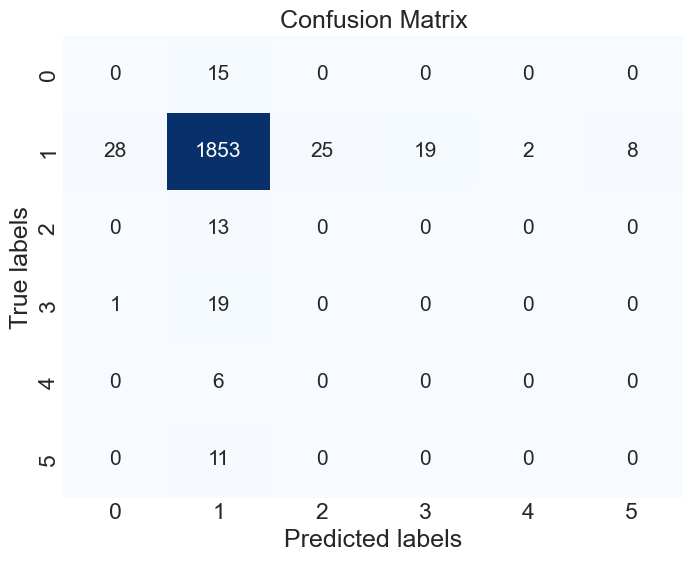

Confusion Matrix:
[[   0   15    0    0    0    0]
 [  28 1853   25   19    2    8]
 [   0   13    0    0    0    0]
 [   1   19    0    0    0    0]
 [   0    6    0    0    0    0]
 [   0   11    0    0    0    0]]


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred2 = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy = {accuracy:.2f}%")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)


In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score
b=recall_score(y_test,y_pred1,average='macro')
b


0.15960378983634796

## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
y_pred3 = dt.predict(x_test)
accuracy = rf.score(x_test, y_test) * 100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 96.75%


## SVM

In [59]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
y_pred4 = dt.predict(x_test)
accuracy = svm.score(x_test, y_test) * 100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 96.75%


## Model Comparison & Evaluation

In [82]:
from sklearn.linear_model import LogisticRegression
x=(x-np.min(x))/(np.max(x)-np.min(x))
log=LogisticRegression()
log.fit(x_train,y_train)
accuracy = log.score(x_test, y_test) * 100
print(f" LOR Accuracy = {accuracy:.2f}%")

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
accuracy = dt.score(x_test, y_test) * 100
print(f" DCT Accuracy = {accuracy:.2f}%")

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
accuracy = rf.score(x_test, y_test) * 100
print(f"RFC Accuracy = {accuracy:.2f}%")

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
accuracy = svm.score(x_test, y_test) * 100
print(f"SVC Accuracy = {accuracy:.2f}%")

C:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 LOR Accuracy = 96.75%
 DCT Accuracy = 91.95%
RFC Accuracy = 96.75%
SVC Accuracy = 96.75%


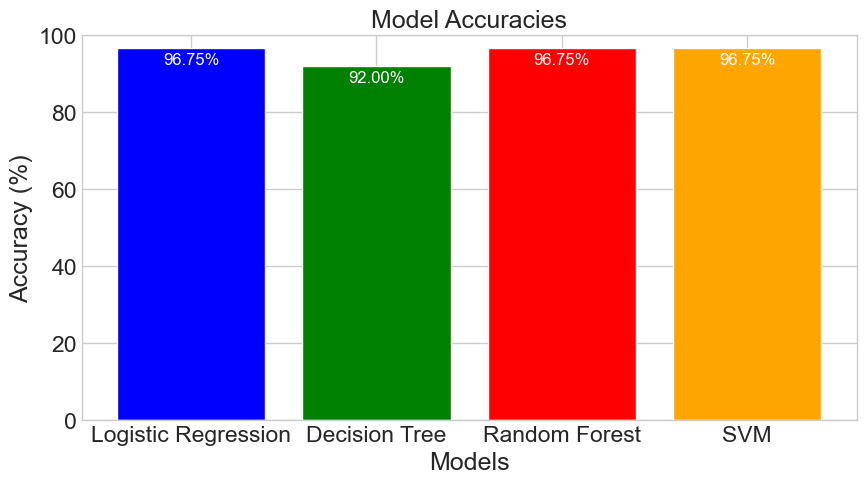

In [83]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': 96.75,
    'Decision Tree': 92.00,
    'Random Forest': 96.75,
    'SVM': 96.75
}

models = list(accuracies.keys())
values = list(accuracies.values())
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, values, color=colors)


for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=12)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100) 
plt.show()


In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score
a = log.score(x_test, y_test) * 100

b=precision_score(y_test,y_pred1,average='macro')
c=recall_score(y_test,y_pred2,average='macro')
d=f1_score(y_test,y_pred3,average='macro')


In [103]:
print(f"Accuracy = {a:.2f}%")
print(f"Precision= {b*100:.4f} %")
print(f"Recall= {c*100:.4f} %")
print(f"F1 Score= {d*100:.4f} %")

Accuracy = 96.75%
Precision= 16.1102 %
Recall= 15.9604 %
F1 Score= 16.0350 %


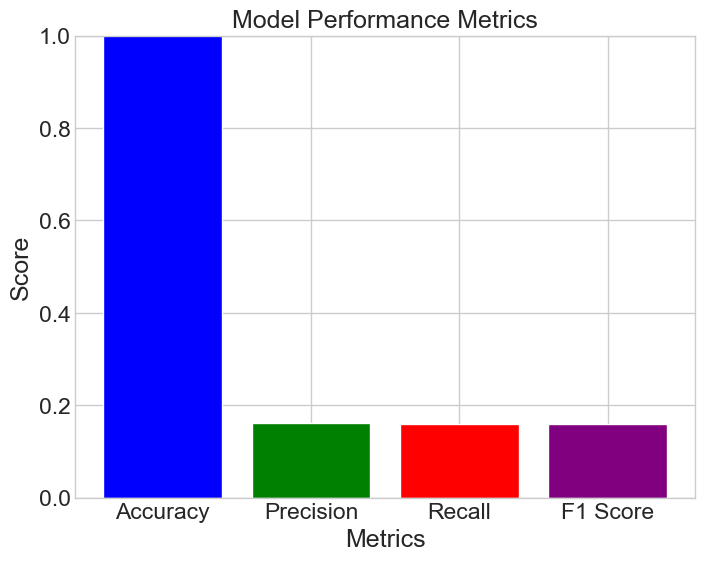

In [104]:
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [a, b, c, d]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0.0, 1.0)  
plt.grid(True)
plt.show()


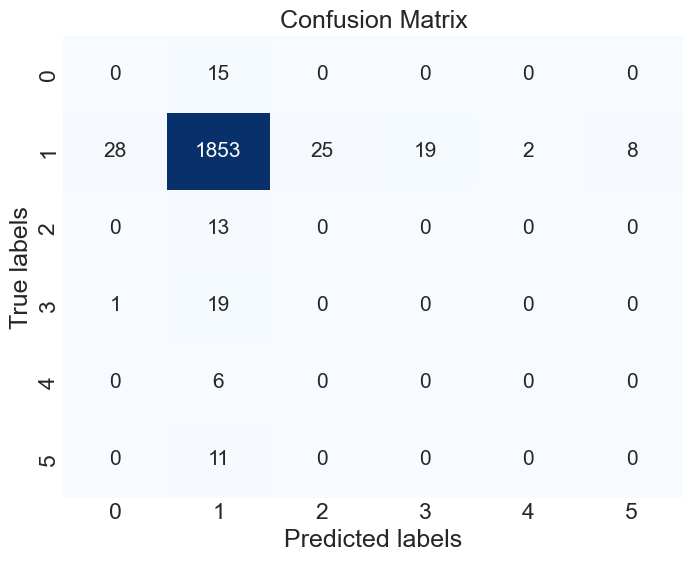

Confusion Matrix:
[[   0   15    0    0    0    0]
 [  28 1853   25   19    2    8]
 [   0   13    0    0    0    0]
 [   1   19    0    0    0    0]
 [   0    6    0    0    0    0]
 [   0   11    0    0    0    0]]


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)


## Prediction User Value

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss

df = pd.read_csv('Maintenance_Info2.csv')
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


air_temp = float(input("Enter Air temperature [K]: "))
process_temp = float(input("Enter Process temperature [K]: "))
rotational_speed = float(input("Enter Rotational speed [rpm]: "))
torque = float(input("Enter Torque [Nm]: "))

input_data = {'Air temperature [K]': [air_temp], 'Process temperature [K]': [process_temp], 'Rotational speed [rpm]': [rotational_speed], 'Torque [Nm]': [torque]}
input_df = pd.DataFrame(input_data)
prediction = model.predict(input_df)
print('Prediction:', prediction)

if prediction == 0:
    print("NO FAILURE")
else:
    print("FAILURE")


Accuracy: 0.9725
